In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns;sns.set()
import physt
from physt import h1, h2, histogramdd
import plotly.graph_objects as go


In [10]:
def main():
    data = pd.read_csv('n90pol.csv')
    data = data.values[:, :2]
    m ,n = data.shape
    # for 2 dimensional data - matplotlib
    min_data = data.min(0)
    max_data = data.max(0)
    nbin = 15        # you can change the number of bins in each dimension
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(data[:,0], data[:,1], bins=nbin)
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
    xpos = xpos.flatten()/2.
    ypos = ypos.flatten()/2.
    zpos = np.zeros_like (xpos)
    dx = xedges [1] - xedges [0]
    dy = yedges [1] - yedges [0]
    dz = hist.flatten()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
    #plotting 2d histogram using physt
    histogram = h2(data[:,0], data[:,1], bins=15, name="2D histogram", axis_names=["amigdala", "acc"])
    histogram.plot("bar3d", cmap="rainbow",figsize=(7,7))
    
    #seperating the range to the bins
    bins = 30
    range_bin1 = (max_data[0] - min_data[0])/bins
    range_bin2 = (max_data[1] - min_data[1])/bins
    
    gridx,gridy = np.meshgrid(np.arange(min_data[0], max_data[0], range_bin1),
    np.arange(min_data[1], max_data[1], range_bin2))
    
    h = np.std(data)*1.06*np.sqrt((1/m),order=5)
    gridall = [gridx.flatten(order='F'), gridy.flatten(order='F')]
    gridall = np.asarray(gridall).T
    
    #Calculating the probability
    prob_list = []
    calc_mat = (data[:, np.newaxis] - gridall)/h

    for i in range(calc_mat.shape[1]):
        K_output = np.apply_along_axis(K, 1, calc_mat[:, i])
        probability = np.mean((1/h)*K_output)
        prob_list.append(probability)

    prob_array = np.array(prob_list)
    #Plotting KDE
    plt.figure(figsize=(12,8))
    sns.kdeplot(data, data2=prob_array, cmap='coolwarm', legend=True,shade=True)
    plt.xlabel('Amigdala')
    plt.title('KDE plot')
    plt.ylabel('cc')
    plt.show()

In [11]:
# Gaussian kernel
def K(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-(np.power(x[0],2) + np.power(x[1],2))/2)

/home/dror/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning:

Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead



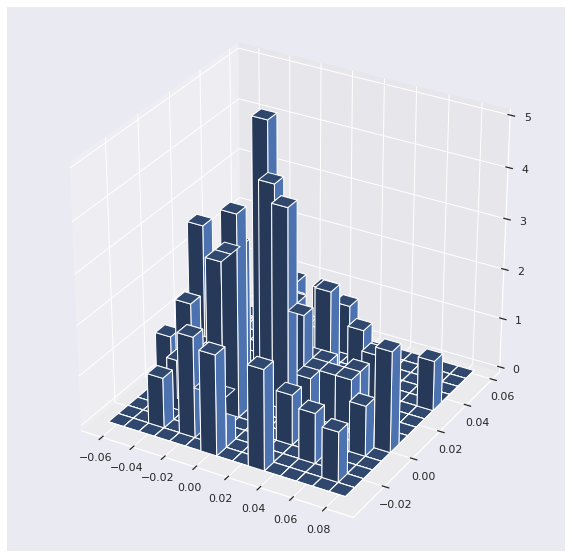

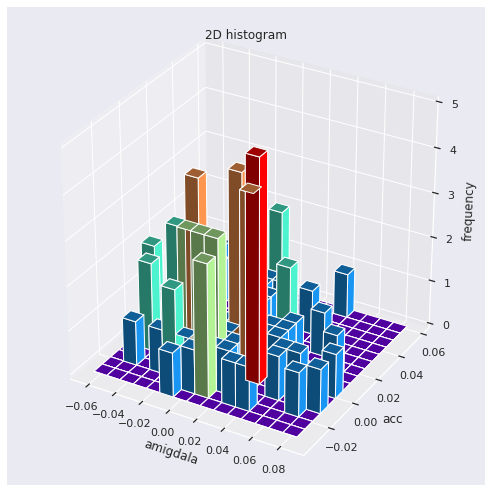

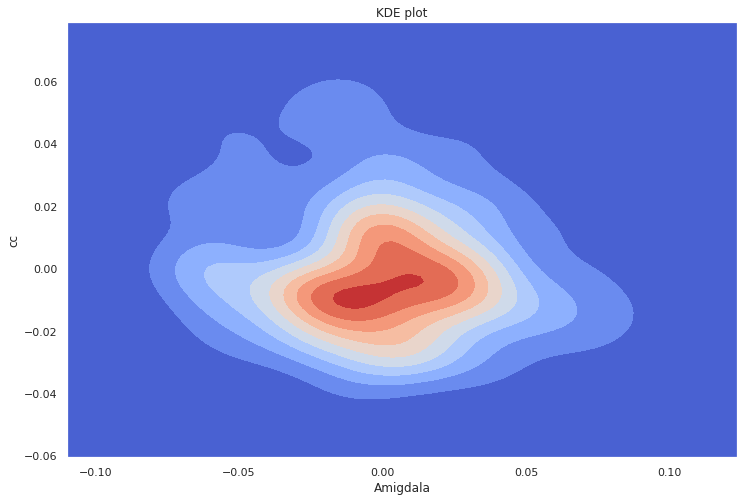

In [12]:
if __name__ == "__main__":
    main()